# Lecture 09a. Classification using KNN scikit learn implementation.

### A refactoring of a nice blog that could be improved a lot.
[this blog post](https://medium.com/codex/machine-learning-k-nearest-neighbors-algorithm-with-python-df94b374ad41)

### The *iris* plants dataset, loaded from seaborn
[iris flowers](https://en.wikipedia.org/wiki/Iris_(plant))  
[iris setosa](https://en.wikipedia.org/wiki/Iris_setosa)  
[Iris Versicolour](https://en.wikipedia.org/wiki/Iris_versicolor)  
[Iris Virginica](https://en.wikipedia.org/wiki/Iris_virginica)

[Info about dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.names)    


### Remember about KNN:  
tell me who your friends are and I will tell you who you are
KNN is a "supervised learning" algo. We know the labels.  
Goal is to classify observations to known categories.  
[Intro to KNN by my favorite tutor](https://www.youtube.com/watch?v=HnCHdeyJNOM)  
"Tall skinny dataset"

### Import necessary modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## A. Examine the data, using graphs (EDA) and statistics.

In [2]:
# seaborn loads training datasets and returns a pandas dataframe
df = sns.load_dataset('iris')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# seaborn loads training datasets and returns a pandas dataframe which contains X and y.
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,versicolor
33,5.5,4.2,1.4,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor
120,6.9,3.2,5.7,2.3,virginica
53,5.5,2.3,4.0,1.3,versicolor


#### A1. Basic info about the data.

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Descriptive stats on all the data offer no insights concerning the 3 different categories (species).
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Species differences are obvious with scimple descriptive stats.
df.groupby("species").describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

### Various plots for EDA

In [12]:
sns.

Type:        module
String form: <module 'seaborn' from '/home/tharg/venv_projects/uoa_py_course/course_venv/lib/python3.11/site-packages/seaborn/__init__.py'>
File:        ~/venv_projects/uoa_py_course/course_venv/lib/python3.11/site-packages/seaborn/__init__.py
Docstring:   <no docstring>

In [15]:
# Matplotlib styles
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
# Set a common style for all plots.
# style.use('seaborn-whitegrid') # this used to work a year ago.
style.use("seaborn-v0_8-whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

#### A2. Sepal scatter visualization

In [74]:
# sns.scatterplot?

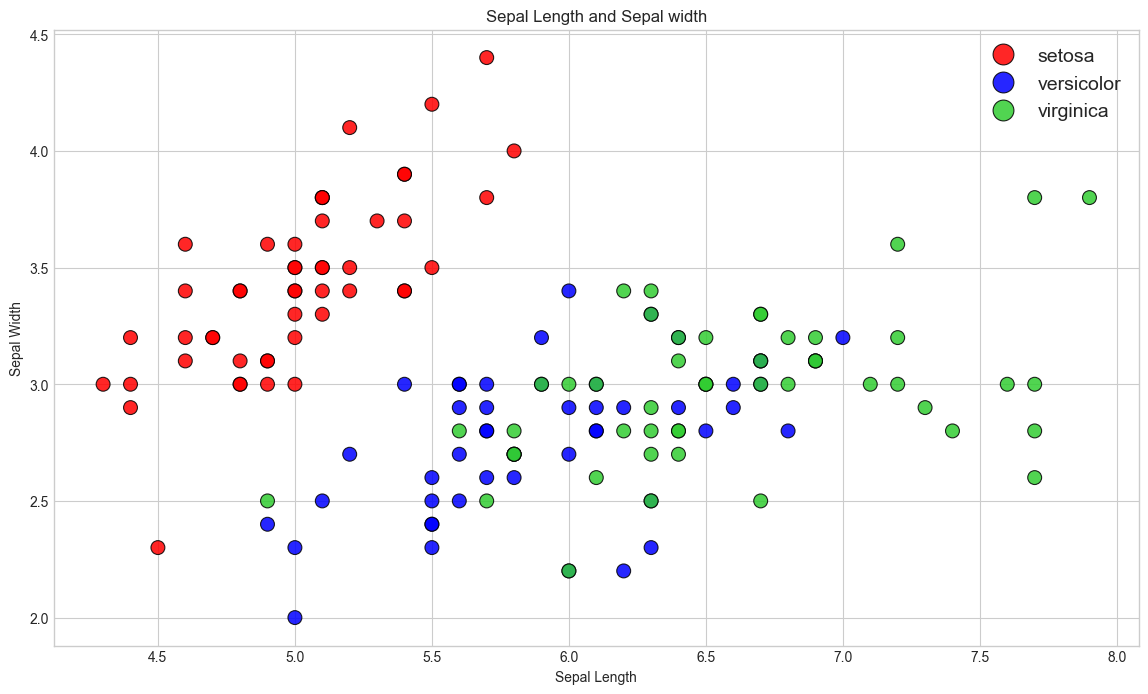

In [103]:
# Write functions with many parameters using one line for each parameter: Readability and Flexibility. Faster, cleaner coding.
sns.scatterplot(data=df,
                x='sepal_length',
                y='sepal_width',
                hue='species',
                palette=['Red', 'Blue', 'Limegreen'],
                # palette = 'Set2', # Try this one.
                edgecolor='black',
                s=100,
                alpha=0.85  # try setting 0.5
)

plt.title('Sepal Length and Sepal width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(markerscale=1.5, loc="upper right", prop={'size': 14});  # Try different marker scales.

# plt.savefig("sepal.png")  # Can you guess what does this line of code do?

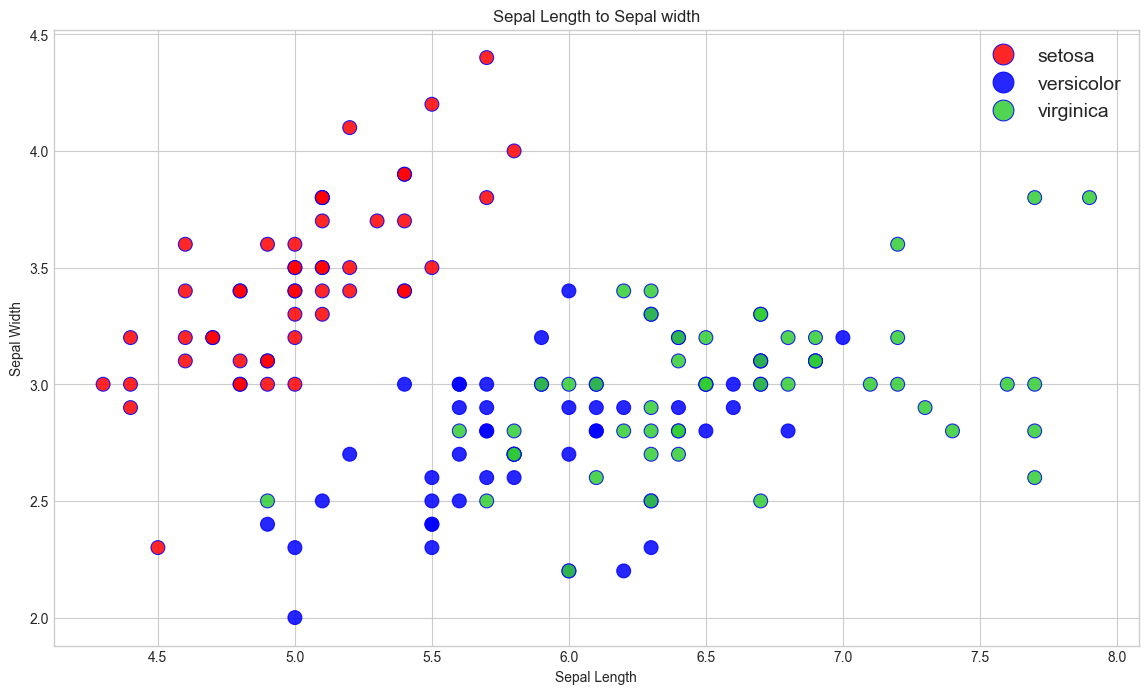

In [110]:
# Spot the three differences in the code between this plot and the one above:
# a)
# b)
# c)

# Write functions with many parameters using one line for each parameter: Readability and Flexibility. Faster, cleaner coding.
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=df,  # a)
    hue='species',
    palette=['red', 'blue', 'limegreen'],  # b)
    edgecolor='b', # c) Can you guess if this is "black" or "blue"? Explicit is better than implicit.
    s=100,
    alpha=0.85
)

plt.title('Sepal Length to Sepal width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(markerscale=1.5, loc="upper right", prop={'size': 14});

# plt.savefig('sepal.png')  # Can you guess what does this line of code do?

#### A3. Petal scatter visualization

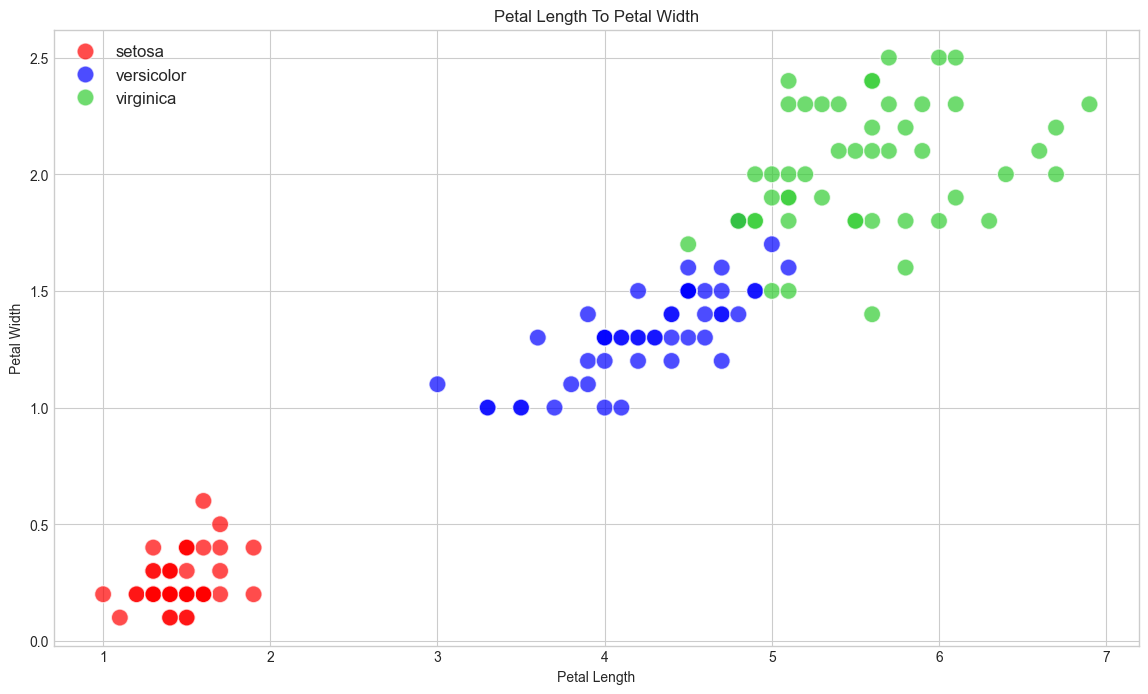

In [114]:
sns.scatterplot(
    x='petal_length', y='petal_width', data=df, hue='species',
    palette = ['Red', 'Blue', 'limegreen'],
    edgecolor = 'w', s = 150, alpha = 0.7
)

plt.title('Petal Length To Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left', fontsize = 12);

# plt.savefig('petal.png')

In [12]:
# sns.heatmap?

#### A4. Data Heatmap

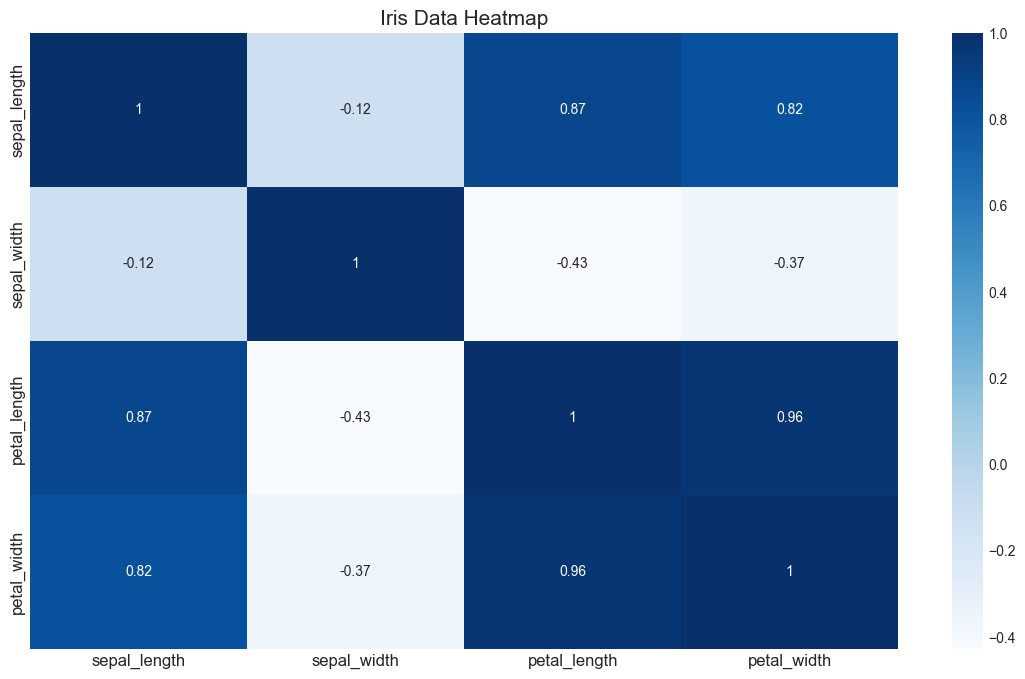

In [117]:
# df_corr = df.corr()  # This used to work until Pandas 2.0

df_corr = df.corr(numeric_only=True)

sns.heatmap(
    df_corr, annot = True,  cmap = 'Blues',
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values
);

plt.title('Iris Data Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

# plt.savefig('heatmap.png')

#### A5. Scatter Matrix

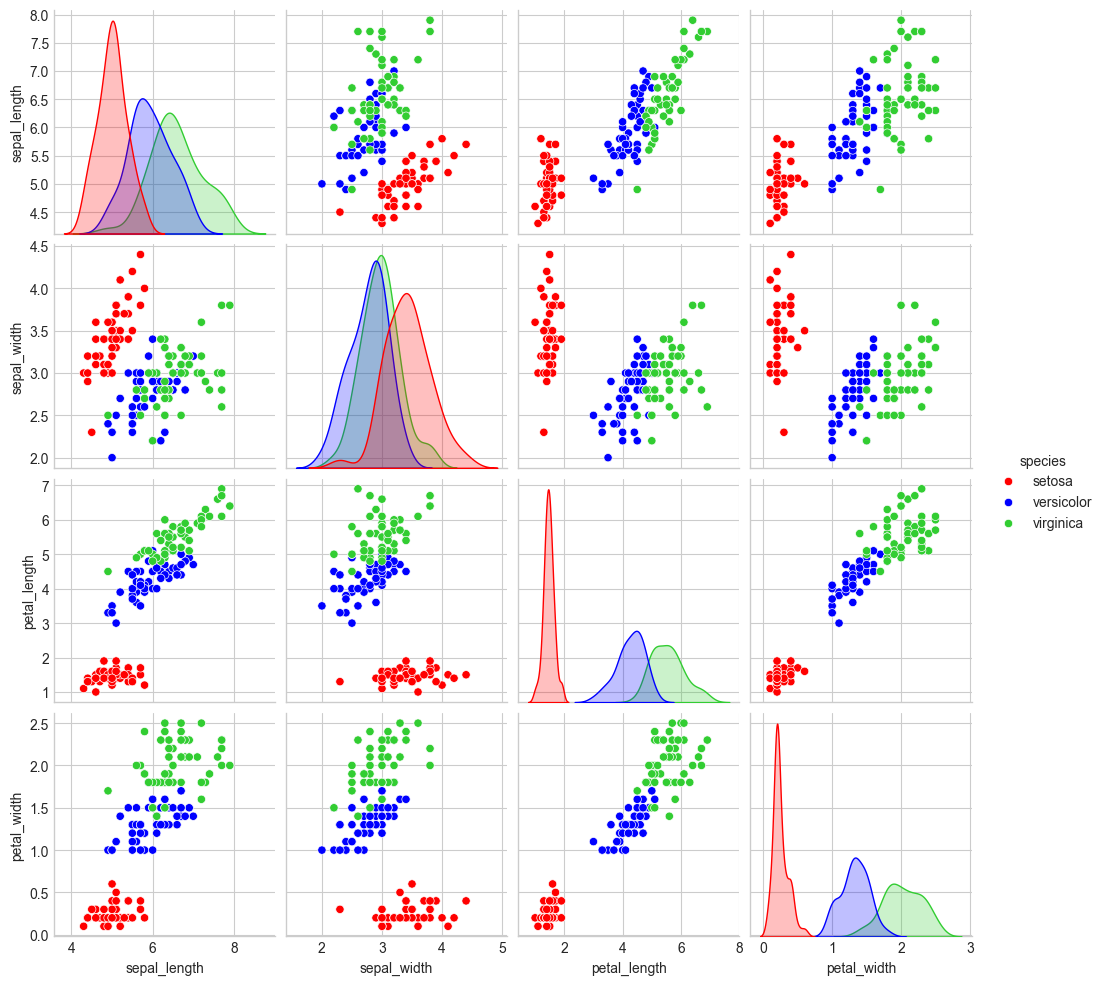

In [118]:
# all features ar numeric, so we use the data as is.
# use the species to 
sns.pairplot(data=df, hue='species', palette=['Red', 'Blue', 'limegreen']);

# plt.savefig('iris_pairplot.png')

/tmp/ipykernel_21559/494418532.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal_length'], color = 'r', shade = True)
/tmp/ipykernel_21559/494418532.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal_width'], color = 'b', shade = True)
/tmp/ipykernel_21559/494418532.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['petal_length'], color = 'coral', shade = True)
/tmp/ipykernel_21559/494418532.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['petal_width'], color =

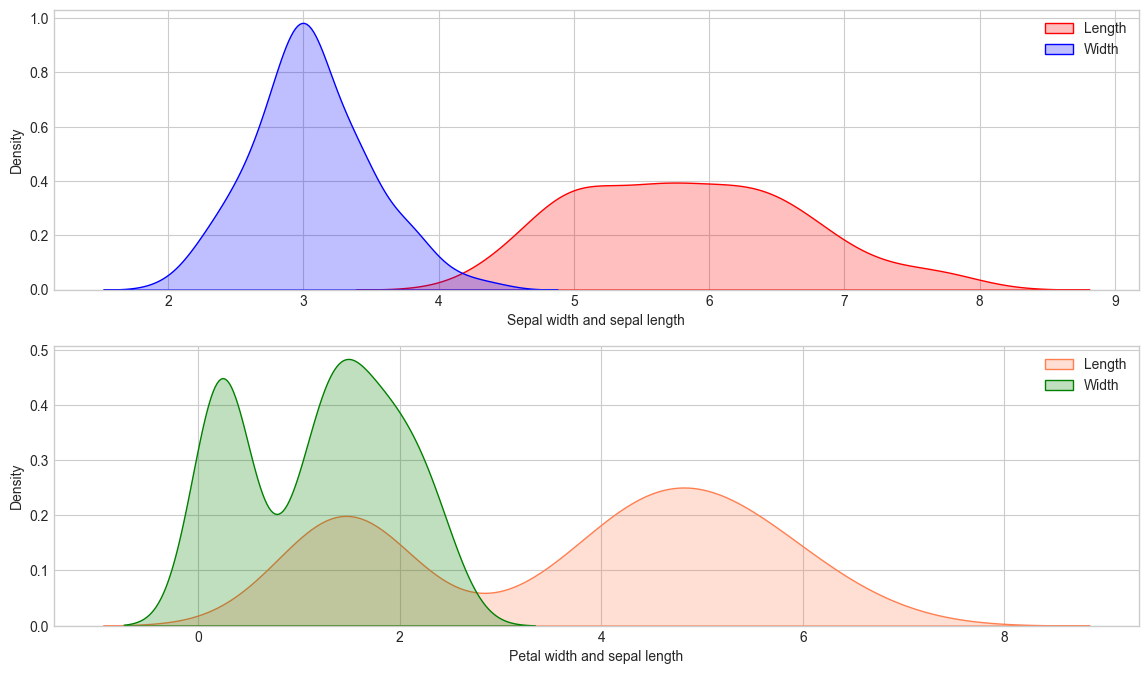

In [119]:
# 5. Distribution plot for all species of iris

ax1 = plt.subplot(211)
sns.kdeplot(df['sepal_length'], color = 'r', shade = True)
sns.kdeplot(df['sepal_width'], color = 'b', shade = True)
plt.xlabel('Sepal width and sepal length');
plt.legend(["Length", "Width"])


ax2 = plt.subplot(212)
sns.kdeplot(df['petal_length'], color = 'coral', shade = True)
sns.kdeplot(df['petal_width'], color = 'green', shade = True);
plt.xlabel('Petal width and sepal length');
plt.legend(["Length", "Width"])

# plt.savefig('dist.png')

## B. Apply knn, using scikit learn

When using a function from library, a very important thing to know: the "input" data type. Also remember: libraries evolve fast.

### B1. Data Pre-processing 

#### B1.1 Separate:  
* "feature matrix" = (explanatory variables)
* "clasification vector" = (target variable)

In [120]:
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
# convert to numpy array is not necessary, scikit works with pandas dataframes since ages.

X = df.iloc[:, :-1]#.to_numpy()
y = df['species']#.to_numpy()

In [121]:
X.head()
# X[:5]  # same result, pythonic syntax

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
y.sample(5)
# y[:5]

105     virginica
51     versicolor
79     versicolor
89     versicolor
16         setosa
Name: species, dtype: object

#### B1.2 Scale the data (if necessary)  

In this case, the features all have the same scale, so this step is NOT necessary.  
Below are some examples of scaling methods, for you to practice.

In [123]:
# standardization = subtract the mean and divide by s. Mean becomes zero and s = 1
# X = StandardScaler().fit_transform(X.astype(float))

# X = MaxAbsScaler().fit_transform(X.astype(float))  # feature_range=[-1, 1]

# X = MinMaxScaler().fit_transform(X.astype(float))  # feature_range=(min, max)

# X.head()

#### B1.3 Split data in train set and test set   
The result is four different "data" subsets. Can you understand which four and why?

#### IMPORTANT: k-NN does NOT need TRAIN & TEST => "lazy learning algo".

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [125]:
# a subset:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [126]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [127]:
X_test.shape, y_test.shape

((45, 4), (45,))

### B2. Implement the scikit library

#### B2.1 Select N of neighbours and classifier model

In [128]:
k = 5

# name that we gave to the "algo"
neighbours = KNeighborsClassifier(n_neighbors=k)

#### B2.2 Fit the model to the train set (a subset of the data)

In [129]:
neighbours.fit(X_train, y_train);

#### B2.3 Create predictions on test set

In [130]:
# this creates a new, fifth subset
y_pred = neighbours.predict(X_test)

In [131]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

#### B2.4 predict a single observation

In [132]:
X_test.head(1)

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4


In [133]:
X_test.iloc[0:1]

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4


In [134]:
y_pred_obs_number_one = neighbours.predict(X_test.iloc[0:1])
y_pred_obs_number_one

array(['virginica'], dtype=object)

In [135]:
y_test[0:1]

114    virginica
Name: species, dtype: object

In [136]:
# read warning and undestand it. Data without names, still works because of training.
y_pred_my_whatever_numbers = neighbours.predict([[5.8, 2.8, 5.1, 2.4]])
y_pred_my_whatever_numbers

/home/tharg/venv_projects/uoa_py_course/course_venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

### B3. Evaluate model performance

#### B3.1 Accuracy score

In [137]:
# using the default score()  function
neighbours.score(X_test, y_test)

0.9777777777777777

In [138]:
round(accuracy_score(y_test, y_pred) * 100, 4)

97.7778

In [139]:
y_test[:10], y_pred[:10]

(114     virginica
 62     versicolor
 33         setosa
 107     virginica
 7          setosa
 100     virginica
 40         setosa
 86     versicolor
 76     versicolor
 71     versicolor
 Name: species, dtype: object,
 array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
        'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor'],
       dtype=object))

In [140]:
y_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred},
                    columns=['y_test', 'y_pred'])

y_df["pred"] = y_df.y_test == y_df.y_pred

In [141]:
y_df.head()

,y_test,y_pred,pred
114,virginica,virginica,True
62,versicolor,versicolor,True
33,setosa,setosa,True
107,virginica,virginica,True
7,setosa,setosa,True


In [142]:
y_df[y_df.pred == False]

,y_test,y_pred,pred
83,versicolor,virginica,False


#### B3.2 Confusion Matrix

In [143]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,17,1,18
virginica,0,0,11,11
All,16,17,12,45


### B4. Compare different number of k for neighbors  
[simple loops](https://www.kaggle.com/jmataya/k-nearest-neighbors-classifier)

In [144]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(2, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [145]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [146]:
test_accuracy

array([0.97777778, 0.97777778, 0.97777778, 0.97777778, 0.97777778,
       0.97777778, 0.97777778, 0.97777778, 0.97777778, 0.97777778,
       0.97777778, 0.97777778, 0.97777778, 0.97777778, 0.97777778,
       0.97777778, 0.97777778, 0.97777778])

In [147]:
train_accuracy

array([0.96190476, 0.96190476, 0.97142857, 0.97142857, 0.96190476,
       0.97142857, 0.97142857, 0.96190476, 0.97142857, 0.96190476,
       0.97142857, 0.96190476, 0.96190476, 0.96190476, 0.96190476,
       0.96190476, 0.96190476, 0.96190476])

In [148]:
test_accuracy[5]

0.9777777777777777

In [149]:
train_accuracy[2]

0.9714285714285714

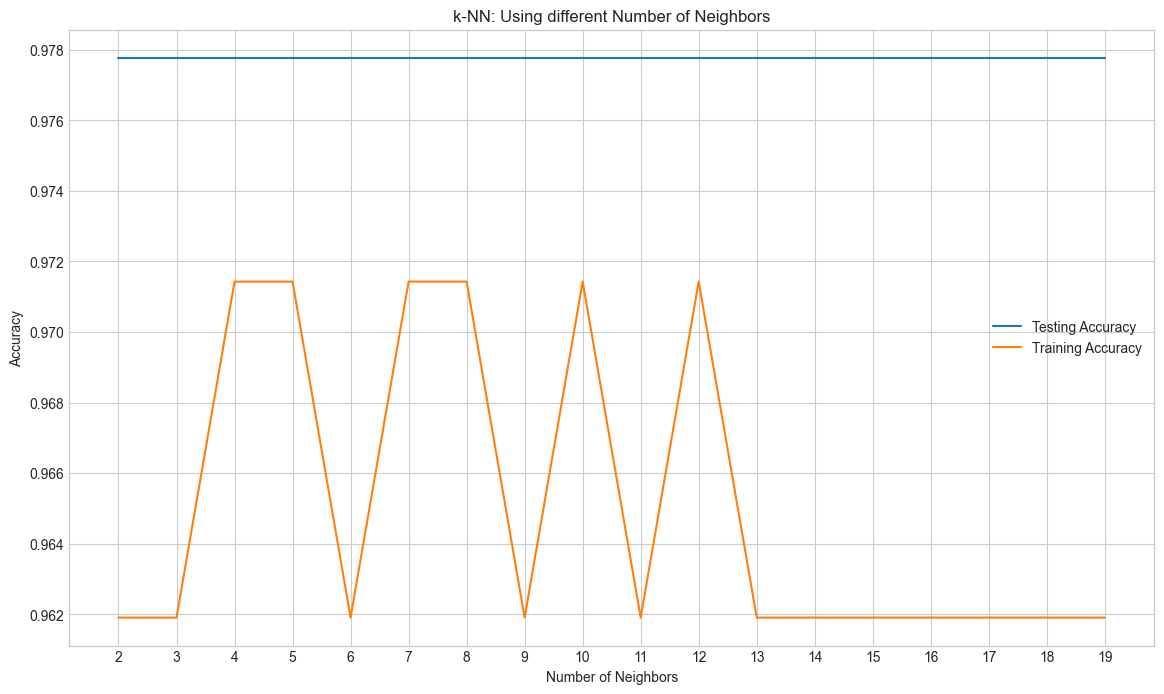

In [150]:
# Generate plot
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

### B5. Direct implementation without train and test sets.

In [151]:
k = 5

# name that we gave to the "algo"
neighbours = KNeighborsClassifier(n_neighbors=k)

In [152]:
neighbours.fit(X, y);

In [153]:
neighbours.score(X, y)

0.9666666666666667

In [154]:
neighbors = np.arange(2, 20)

accuracy = np.empty(len(neighbors))

In [155]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X, y)
    
    accuracy[i] = knn.score(X, y)

In [156]:
accuracy

array([0.98      , 0.96      , 0.96      , 0.96666667, 0.97333333,
       0.97333333, 0.98      , 0.98      , 0.98      , 0.97333333,
       0.98      , 0.98      , 0.98      , 0.98666667, 0.98666667,
       0.98      , 0.97333333, 0.98      ])

In [157]:
type(accuracy)

numpy.ndarray

In [158]:
max(accuracy)

0.9866666666666667

In [159]:
max(accuracy)

0.9866666666666667

In [160]:
np.amax(accuracy)

0.9866666666666667

In [161]:
len(accuracy)

18

In [162]:
np.argmax(accuracy)

13

In [163]:
accuracy[0]

0.98

In [164]:
accuracy[i] = knn.score(X, y)

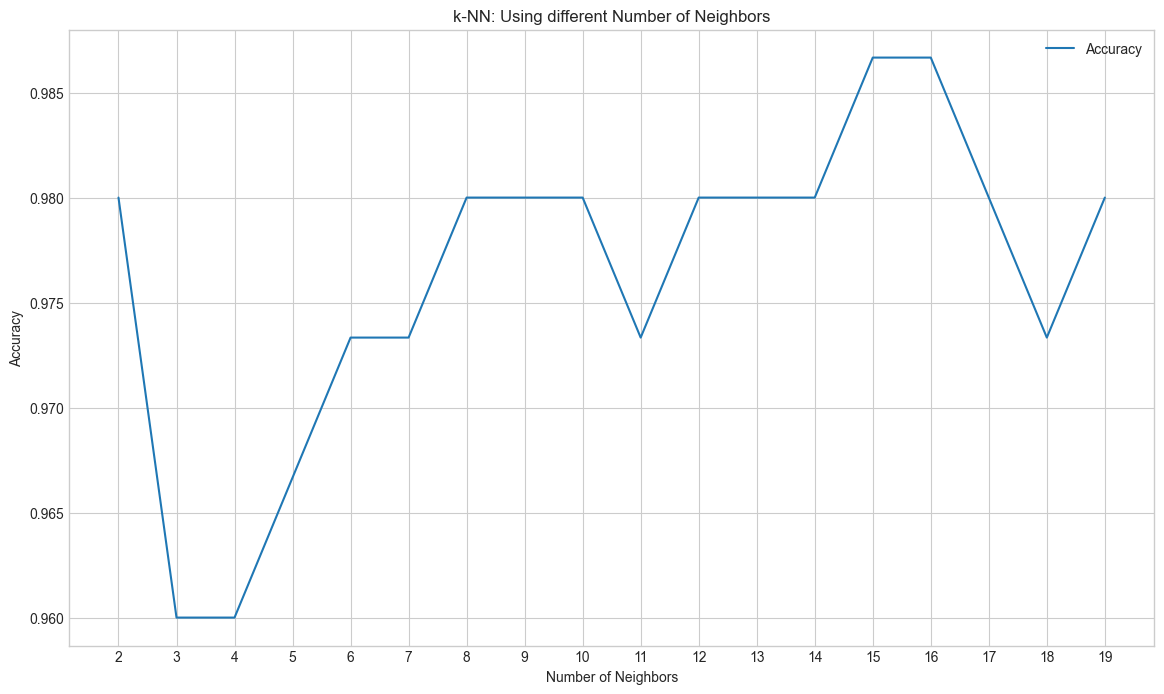

In [165]:
# Generate plot
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')

plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

## C. Discuss optimal k.   

In general VS in case of a tie.

Tie-breaking rules:
even or odd k,  
number of classes,
distribution of classes, SOS
size of dataset,  
random class assignment,  
total distance weights (inverse distance)  
different distance metrics,   
loop over different k,  
k-Fold validation of data.

# Exercise  
Implement KNN on new dataset

In [166]:
from sklearn import datasets

In [167]:
digits = datasets.load_digits()

In [168]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [169]:
type(digits)

sklearn.utils._bunch.Bunch

In [170]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [171]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

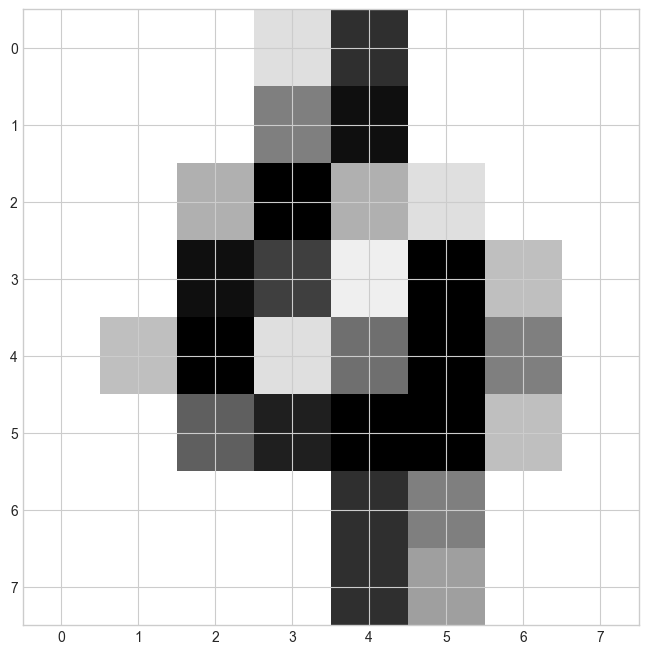

In [172]:
# Display digit observation 1010
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')

[Convert scikit learn data to pandas dataframe](https://stackoverflow.com/a/46379878)  (How it was donw some years ago).

In [173]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_digits = sklearn_to_df(datasets.load_digits())

In [174]:
df_digits.iloc[:,-1]

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

### How it is done now  
Also check [this reply](https://stackoverflow.com/a/62881672).

In [175]:
digits_df = datasets.load_digits(as_frame=True)

In [176]:
digits_df.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [177]:
digits_df.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### The floor is yours!

In [178]:
df_digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [179]:
df_digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [180]:
X = df_digits.iloc[:, :-1]

In [181]:
y = df_digits.iloc[:,-1]

In [182]:
k = 5
knn_for_digits = KNeighborsClassifier(k)

In [183]:
knn_for_digits.fit(X, y)

KNeighborsClassifier()

In [184]:
model_predictions = knn_for_digits.predict(X)

In [185]:
knn_for_digits.score(X,y)

0.9905397885364496